### Example experiments showing utility tradeoffs with randomization when claims are known

In [1]:
from claims_known import experiment
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

### Full BF Lottery: Expected Utility vs Selection Rate

In [2]:
e = experiment("uniform")
res1 = e.full_bf_utility_vs_selection()

e = experiment("normal", 0.5, 0.15)
res2 = e.full_bf_utility_vs_selection()

e = experiment("inv_normal", 0.5, 0.15)
res3 = e.full_bf_utility_vs_selection()

e = experiment("pareto", 2, 1)
res4 = e.full_bf_utility_vs_selection()

e = experiment("inv_pareto", 2, 1)
res5 = e.full_bf_utility_vs_selection()

100%|███████████████████████████████████████| 1000/1000 [00:44<00:00, 22.67it/s]


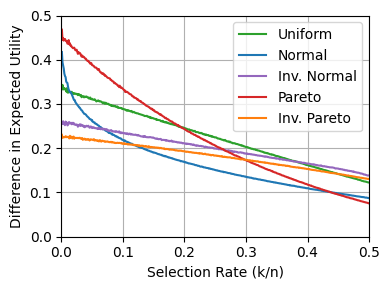

In [3]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

plt.plot(res1["selection_rate"], res1['util_diff'], color="#2ca02c", label="Uniform")
plt.plot(res2["selection_rate"], res2['util_diff'], color="#1f77b4", label="Normal")
plt.plot(res3["selection_rate"], res3['util_diff'], color="#9467bd", label="Inv. Normal")
plt.plot(res4["selection_rate"], res4['util_diff'], color="#d62728", label="Pareto")
plt.plot(res5["selection_rate"], res5['util_diff'], color="#ff7f0e", label="Inv. Pareto")

plt.xlim([0,0.5])
plt.ylim([0,0.5])
plt.ylabel("Difference in Expected Utility")
plt.xlabel("Selection Rate (k/n)")

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
e = experiment("inv_pareto", 1, 1)
res1 = e.full_bf_utility_vs_selection()

e = experiment("inv_pareto", 2, 1)
res2 = e.full_bf_utility_vs_selection()

e = experiment("inv_pareto", 3, 1)
res3 = e.full_bf_utility_vs_selection()

100%|███████████████████████████████████████| 1000/1000 [00:44<00:00, 22.67it/s]


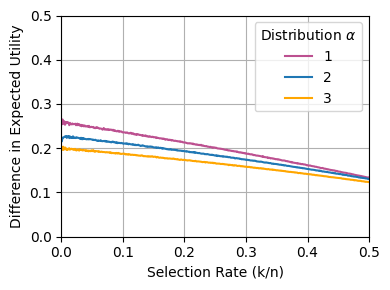

In [6]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

plt.plot(res1["selection_rate"], res1['util_diff'], color="#bc5090", label="1")
plt.plot(res2["selection_rate"], res2['util_diff'], color="#1f77b4", label="2")
plt.plot(res3["selection_rate"], res3['util_diff'], color="#ffa600", label="3")

plt.xlim([0,0.5])
plt.ylim([0,0.5])
plt.ylabel("Difference in Expected Utility")
plt.xlabel("Selection Rate (k/n)")

plt.legend(title="Distribution $\\alpha$")
plt.grid()
plt.tight_layout()
plt.show()

### Partial BF Lottery: Expected Utility vs Selection Rate

In [7]:
e = experiment("normal", 0.5, 0.15)
normal_full = e.full_bf_utility_vs_selection()
normal_partial = e.partial_bf_utility_vs_selection(0.5)

e = experiment("inv_pareto", 2, 1)
pareto_full = e.full_bf_utility_vs_selection()
pareto_partial = e.partial_bf_utility_vs_selection(0.5)

100%|███████████████████████████████████████| 1000/1000 [00:30<00:00, 32.30it/s]


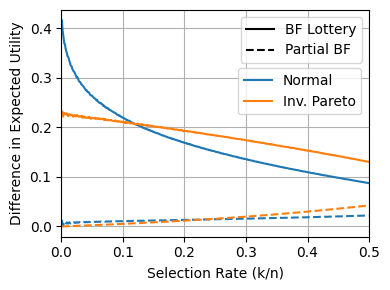

In [8]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

plt.plot(normal_full["selection_rate"], normal_full['util_diff'], linestyle="-", color="#1f77b4")
plt.plot(normal_partial["selection_rate"], normal_partial['util_diff'], linestyle="--", color="#1f77b4")

plt.plot(pareto_full["selection_rate"], pareto_full['util_diff'], linestyle="-", color="#ff7f0e")
plt.plot(pareto_partial["selection_rate"], pareto_partial['util_diff'], linestyle="--", color="#ff7f0e")


plt.xlim([0,0.5])
#plt.ylim([0,0.05])
plt.ylabel("Difference in Expected Utility")
plt.xlabel("Selection Rate (k/n)")

blue_line = mlines.Line2D([], [], color='k', linestyle="-", label="BF Lottery")
blue_line2 = mlines.Line2D([], [], color='k', linestyle="--", label="Partial BF")

first_legend = plt.legend(handles=[blue_line, blue_line2], loc="upper right")
ax = plt.gca().add_artist(first_legend)

blue_line = mlines.Line2D([], [], color='#1f77b4', label="Normal")
blue_line2 = mlines.Line2D([], [], color='#ff7f0e', label="Inv. Pareto")

plt.legend(handles=[blue_line, blue_line2], loc=(0.575,0.54))


plt.grid()
plt.tight_layout()
plt.show()

In [9]:
e = experiment("uniform")
res1 = e.partial_bf_utility_vs_selection(0.25)
res2 = e.partial_bf_utility_vs_selection(0.5)
res3 = e.partial_bf_utility_vs_selection(0.75)

100%|███████████████████████████████████████| 1000/1000 [00:23<00:00, 42.68it/s]


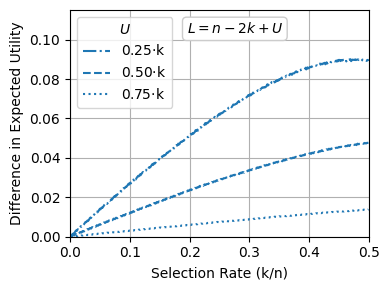

In [11]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

plt.plot(res1["selection_rate"], res1['util_diff'], color="#1f77b4", linestyle="-.", label="0.25$\\cdot$k")
plt.plot(res2["selection_rate"], res2['util_diff'], color="#1f77b4", linestyle="--", label="0.50$\\cdot$k")
plt.plot(res3["selection_rate"], res3['util_diff'], color="#1f77b4", linestyle=":", label="0.75$\\cdot$k")

plt.xlim([0,0.5])
plt.ylim([0,0.115])
plt.ylabel("Difference in Expected Utility")
plt.xlabel("Selection Rate (k/n)")

plt.legend(title="$U$", loc="upper left")
ax.text(0.39, 0.95, "$L=n-2k+U$", transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor="white", edgecolor="0.8"))

plt.grid()
plt.tight_layout()
plt.show()